# Wine Quality

## Importing Dataset

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.layers import Dropout, BatchNormalization
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Input

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Dimension of the dataset

In [55]:
# Display basic information about the dataset - split cells individually (remove print)
df.info()

# For displaying all the columns
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
# Display summary statistics
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [59]:
# Get dimension of dataset
print(df.shape)

(1599, 12)


## Coloumns of dataset

In [61]:
# Get the coloumns of the dataset
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


## Null Values

In [65]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Identifying the categorical variables

In [17]:
print(df.dtypes)

# Convert 'quality' to a categorical variable for classification tasks
df['quality'] = df['quality'].astype('category')

# Verify the conversion
print(df['quality'].dtype)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
category


## Plotting the correlation heatmap

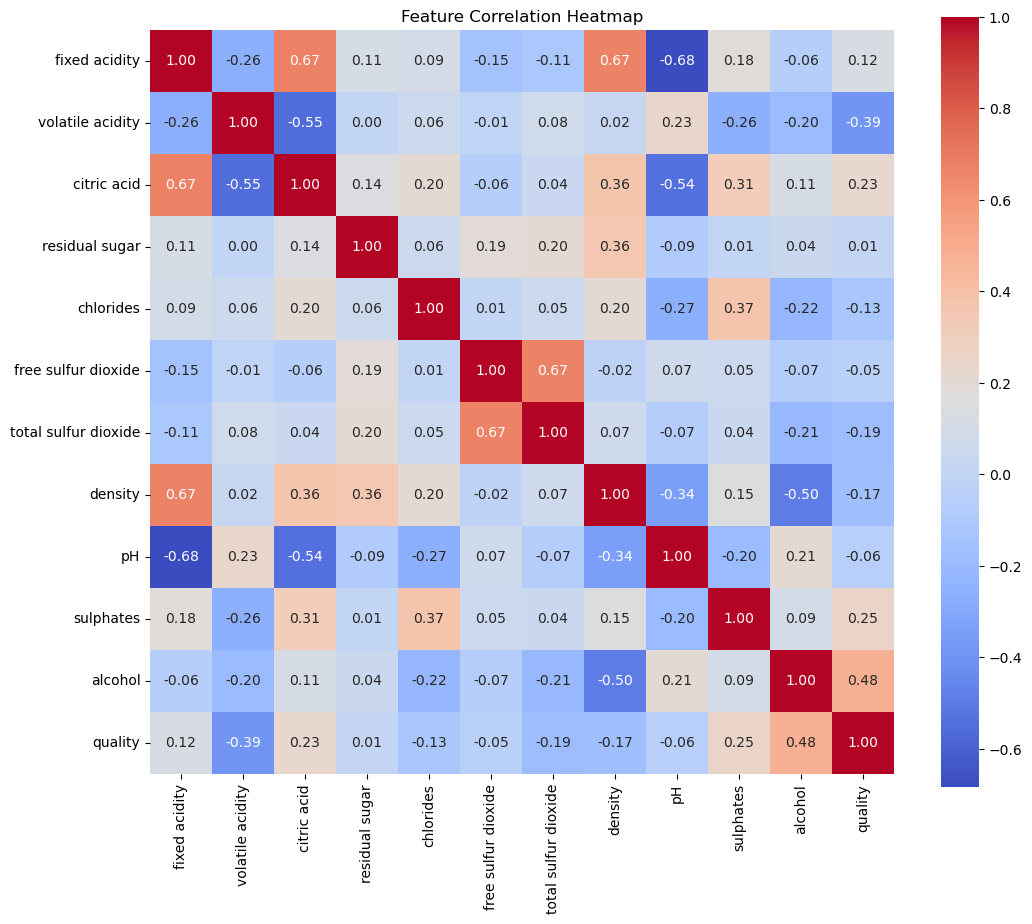

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)

# Add a title to the heatmap
plt.title('Feature Correlation Heatmap')

# Display the plot
plt.show()

## Removing any irrelevant coloumn

In [23]:
# Threshold for low correlation - print low corelation feature
threshold = 0.05

# Calculate absolute correlations with the 'quality' column
correlation_with_quality = df.corr()['quality'].abs()

# Identify columns with low correlation to 'quality'
low_correlation_features = correlation_with_quality[correlation_with_quality < threshold].index.tolist()

# Drop these columns from the DataFrame
df_reduced = df.drop(columns=low_correlation_features)

# Display the remaining columns
print("Remaining columns after dropping low-correlation features:", df_reduced.columns.tolist())

Remaining columns after dropping low-correlation features: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Plotting the correlation heatmap (after coloumn removal)

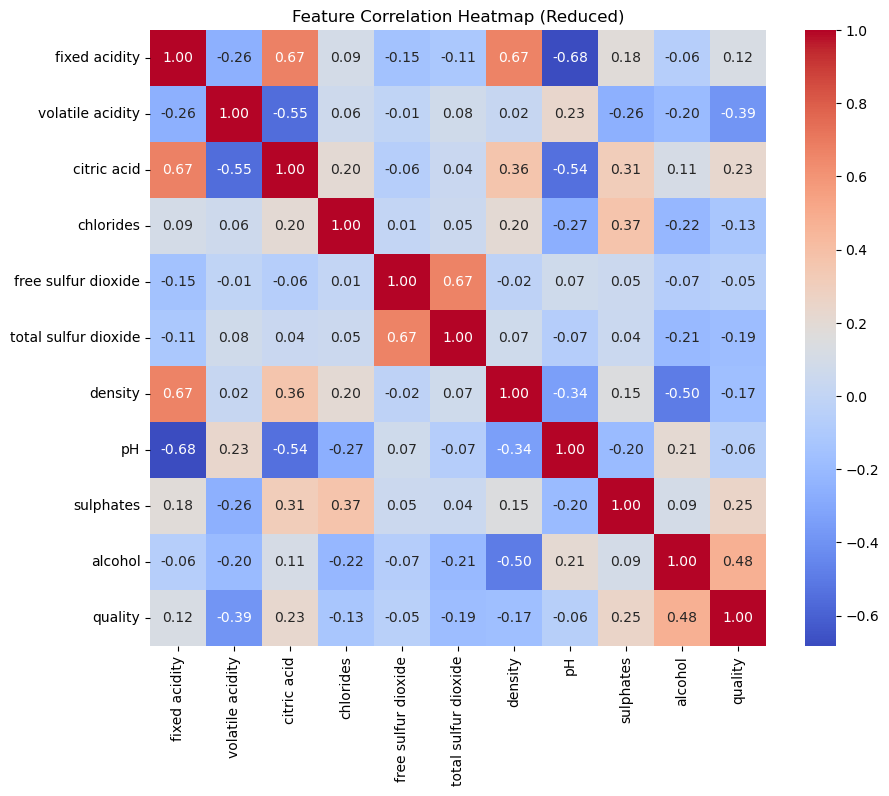

In [26]:
correlation_matrix_reduced = df_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=True)
plt.title('Feature Correlation Heatmap (Reduced)')
plt.show()

## Box plot to identify outliers

/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/466772941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_reduced[feature], palette='viridis')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/466772941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_reduced[feature], palette='viridis')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/466772941.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_reduced[feature], palette='viridis')
/var/folders/kd/xjysn2295b7b3wgz5sp3d

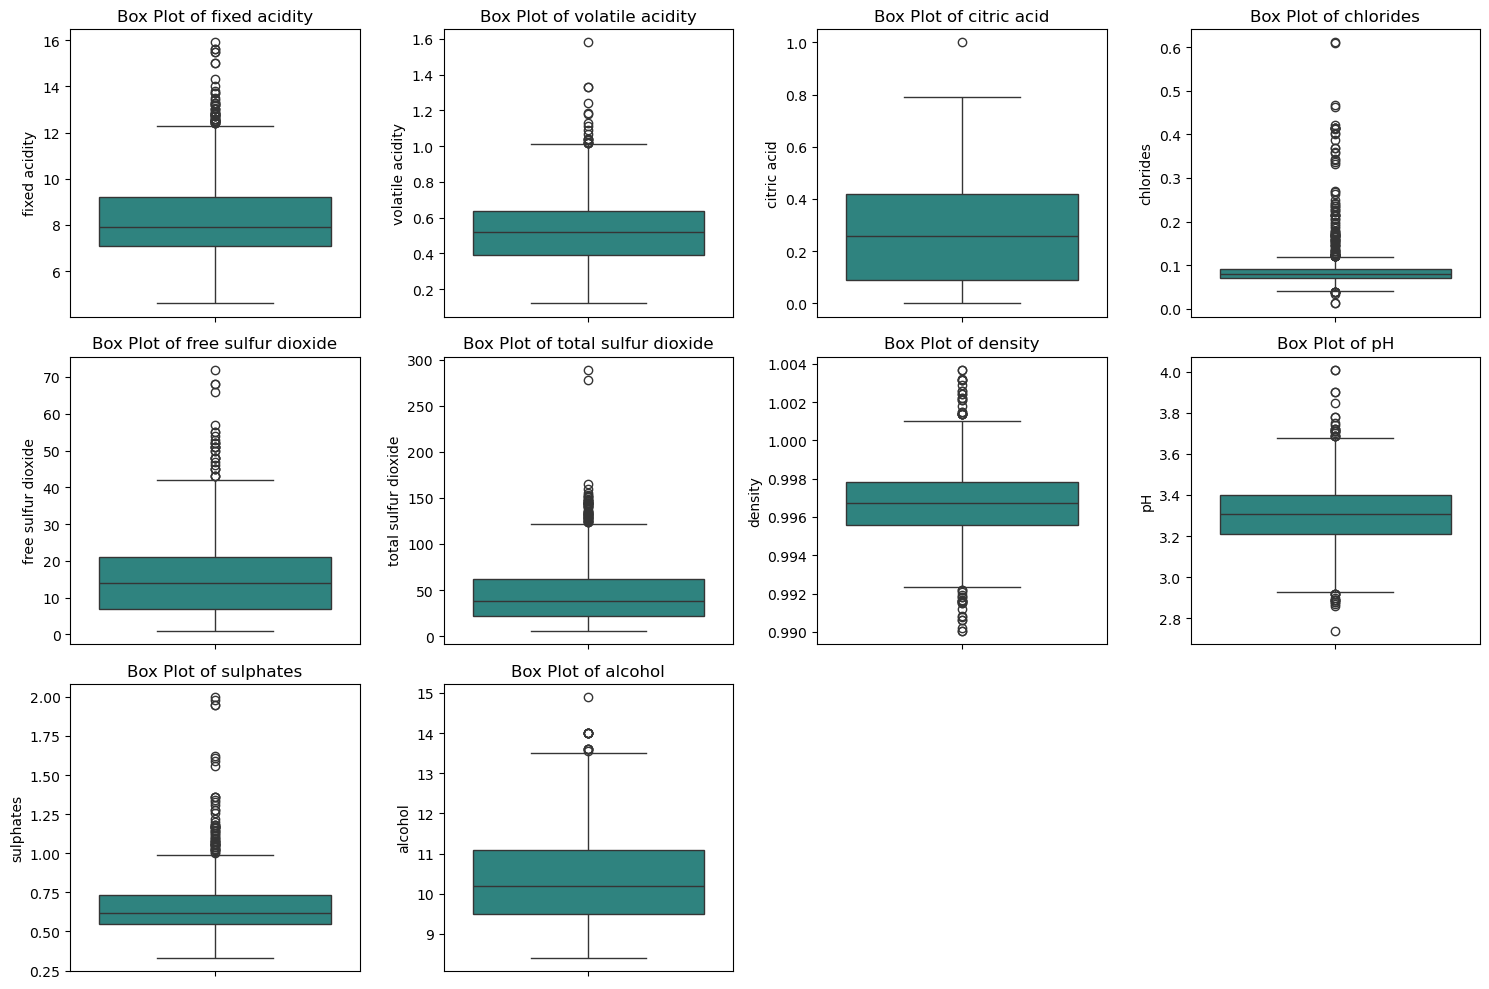

In [29]:
features = df_reduced.columns[:-1]  # Exclude 'quality'

plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid as needed
    sns.boxplot(y=df_reduced[feature], palette='viridis')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

## Visualize outliers using scatterplot

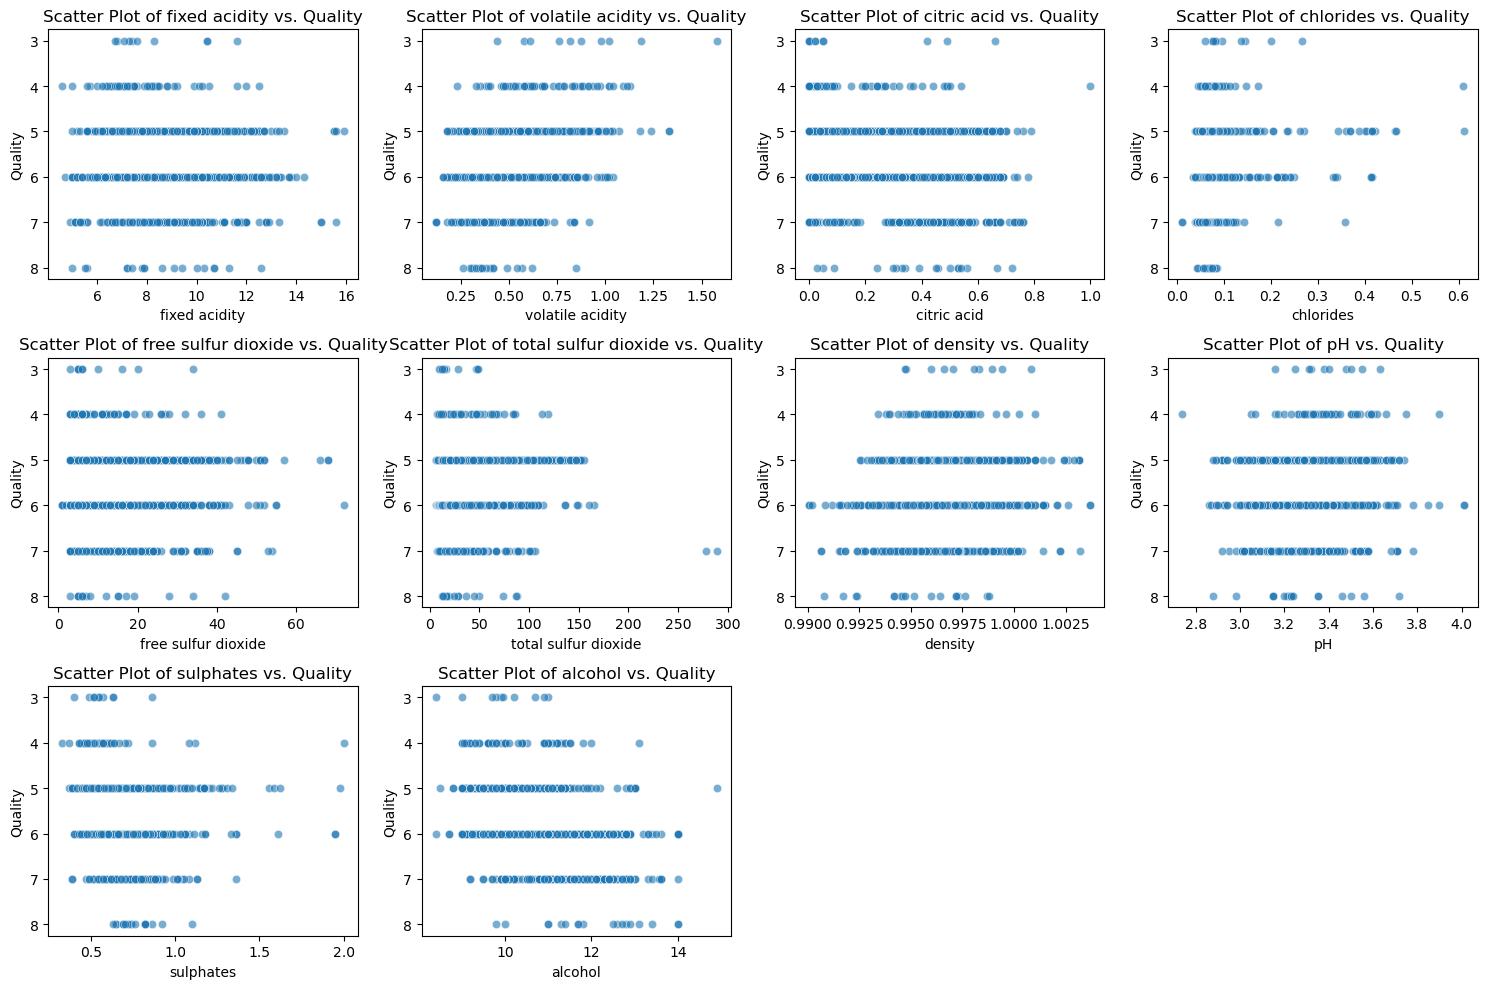

In [32]:
features = df_reduced.columns[:-1] 

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create scatter plots for each feature vs. quality
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid as needed
    sns.scatterplot(x=df_reduced[feature], y=df_reduced['quality'], alpha=0.6)
    plt.title(f'Scatter Plot of {feature} vs. Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()

## Removing outliers

Original dataset shape: (1599, 11)
Dataset shape after removing outliers: (1263, 11)


/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/3072654602.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_no_outliers[feature], palette='viridis')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/3072654602.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_no_outliers[feature], palette='viridis')
/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/3072654602.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_no_outliers[feature], palette='viridis')
/var/folders/kd/xjysn2

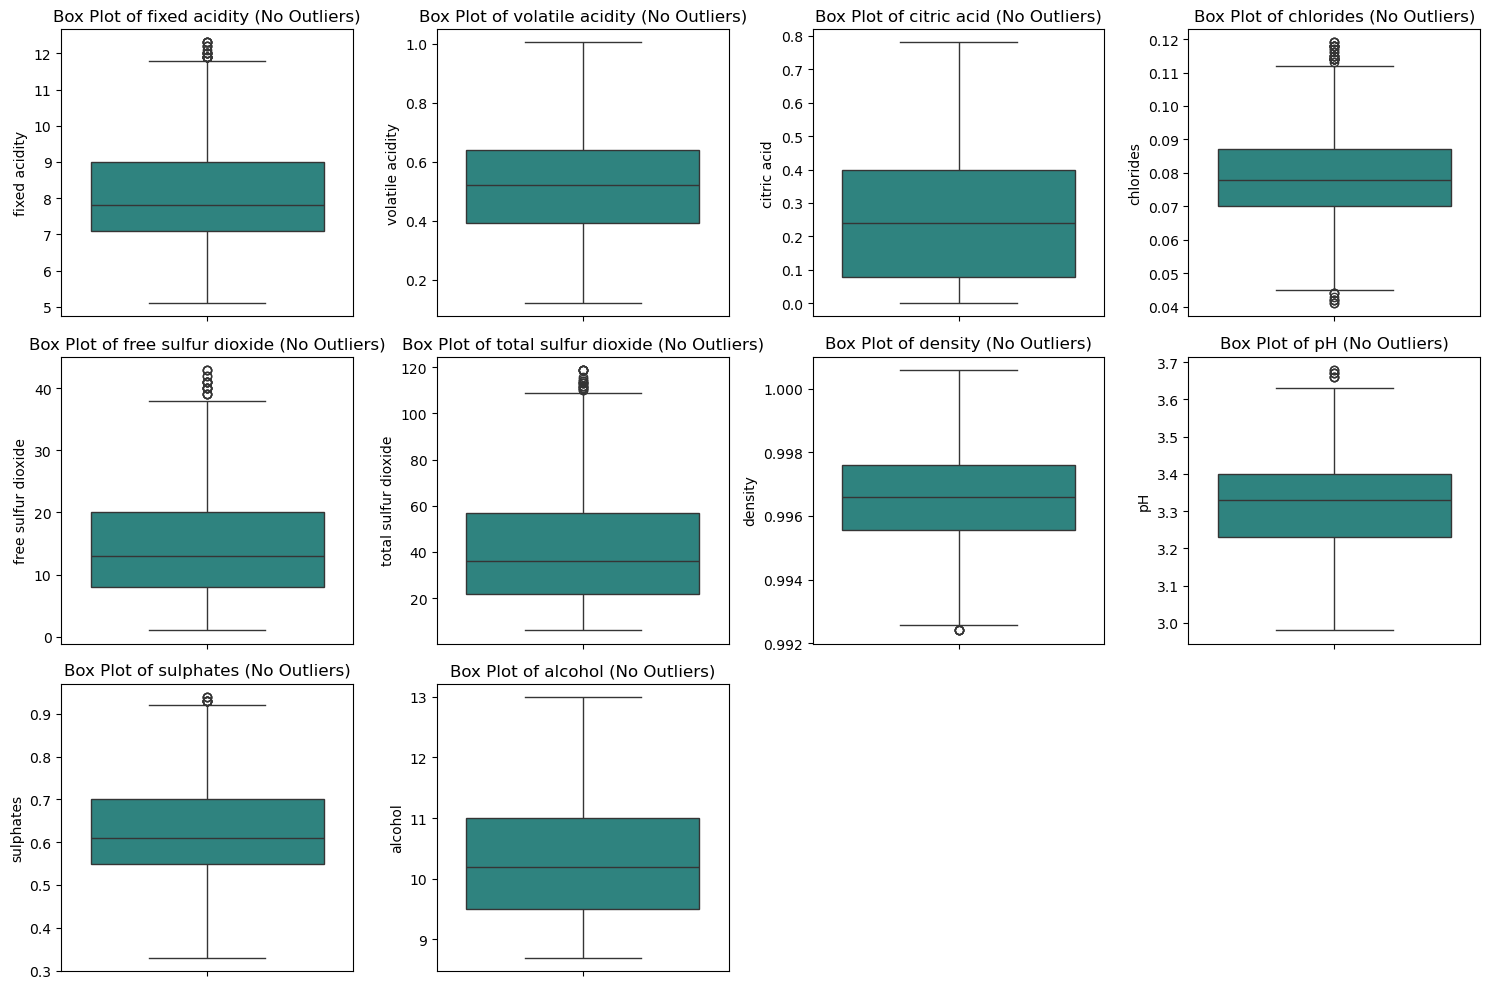

In [35]:
def remove_outliers(df, features):
    # Create a copy of the DataFrame
    df_clean = df.copy()
    
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    
    return df_clean

# List of features to check for outliers
features_to_check = df_reduced.columns[:-1] 

# Remove outliers from the dataset
df_no_outliers = remove_outliers(df_reduced, features_to_check)

# Display the shape of the dataset before and after removing outliers
print("Original dataset shape:", df_reduced.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)

# Set up the figure size
plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Adjust subplot grid as needed
    sns.boxplot(y=df_no_outliers[feature], palette='viridis')
    plt.title(f'Box Plot of {feature} (No Outliers)')

plt.tight_layout()
plt.show()

## Checking for class imbalance

/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/1365547074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df_no_outliers, palette='viridis')


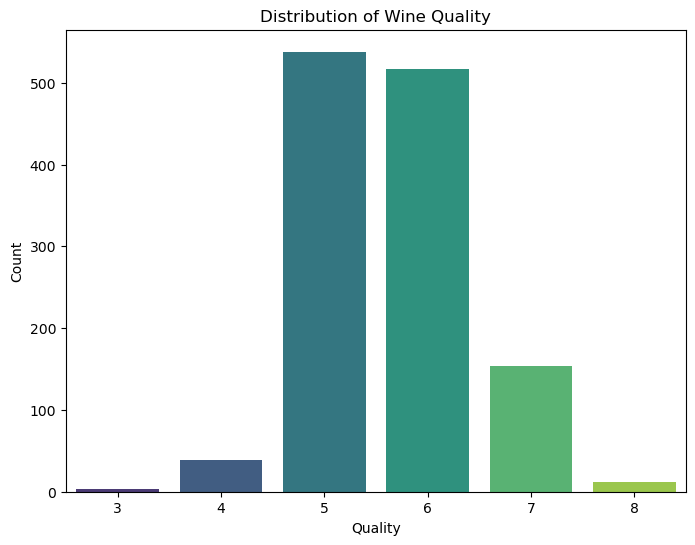

In [38]:
# Plot the distribution of the 'quality' column
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df_no_outliers, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## Removing class imbalance

/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_34023/836977514.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


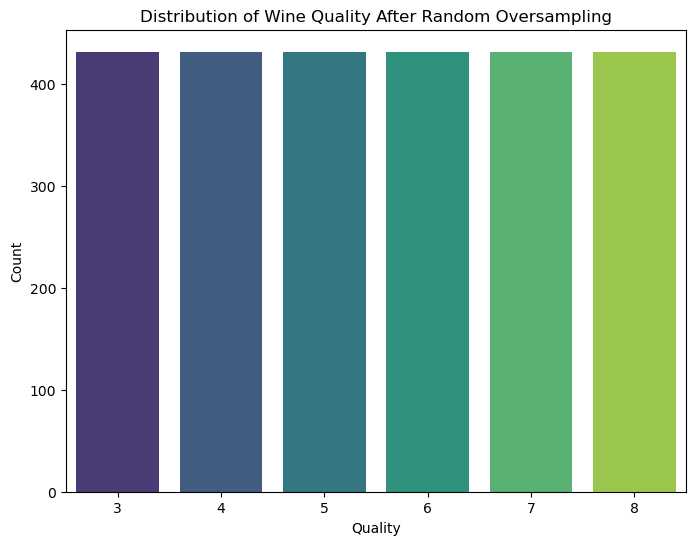

In [41]:
# Separate features and target variable
X = df_no_outliers.drop('quality', axis=1)
y = df_no_outliers['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Plot the distribution after applying Random Oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Distribution of Wine Quality After Random Oversampling')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

## Neural Network

In [49]:
df_no_outliers['quality'].unique()

[5, 6, 7, 4, 8, 3]
Categories (6, int64): [3, 4, 5, 6, 7, 8]

Advanced model accuracy: 64.82%


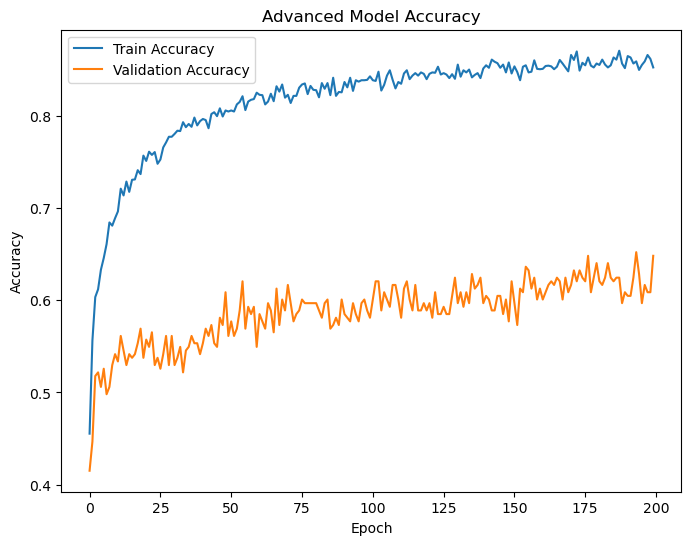

In [67]:
# Separate features and target variable
X = df_no_outliers.drop('quality', axis=1)
y = df_no_outliers['quality']

# One-hot encode the target variable for classification
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

# Define the ANN model function
def create_advanced_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(y_encoded.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the advanced model
model_advanced = create_advanced_model(X_train_scaled.shape[1])
history_advanced = model_advanced.fit(X_train_resampled, y_train_resampled, validation_data=(X_test_scaled, y_test), epochs=200, batch_size=32, verbose=0)
_, accuracy_advanced = model_advanced.evaluate(X_test_scaled, y_test, verbose=0)

# Print accuracy in percentage
print(f"Advanced model accuracy: {accuracy_advanced * 100:.2f}%")

# Plot training & validation accuracy values for the advanced model
plt.figure(figsize=(8, 6))
plt.plot(history_advanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_advanced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Advanced Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


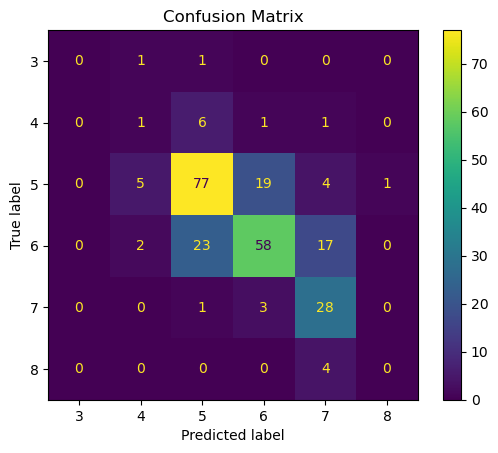

In [69]:
# Predict on the test set
y_pred = model_advanced.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()